# Exploratory Analysis

<div class="alert alert-danger">
You'll need to have an internet connection for portions of this notebook. You can eliminate this dependency by modifying the cell in the "Creating Our Sample Dataframe" section to read a local copy of the iris data rather than pulling it from guthub.
</div>

## Introduction

Some of the leading packages for numerical ("scientific") computation in Python are

* NumPy. Tools for numerical computing. In Excel the basic unit is a cell, a single number. In NumPy the basic unit is a vector (a column) or matrix (a table or worksheet), which allows us to do things with an entire column or table in one line. This facility carries over to Pandas since Pandas is built on NumPy.
* Matplotlib. The graphics package which is essentially the basis for all other visualization packages we'll be using in Python
* Pandas. The leading package for managing data, including tools for visualizing this data. Inherits the basic capabilities on NumPy and Matplotlib.
* Seaborn. Yet another visualization package, again built on matplotlib, but in this case greatly simplifying plots that we'll find useful for statistical analysis.

All of these packages come with the Anaconda distribution, which means we already have them installed and ready to use.

matplotlib is a python 2D plotting library which, according to its developers, "produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms". You can generate plots, histograms, power spectra, bar charts, error charts, scatterplots, etc, with just a few lines of code. Perhaps the best way to get a sense for its capabilities is to look at the [screenshots](http://matplotlib.org/users/screenshots.html), [thumbnails](http://matplotlib.org/gallery.html), and [samples](http://matplotlib.org/examples/index.html) provided at the matplotlib website

### Overview.
In this notebook, we'll introduce several packages that all provide support for performing exploratory analysis.  Typically, we'll use use Pandas to read data into Python, perform some form of processing, and then visualize the results in one of our visualization tools (matplotlib, pandas itself, or seaborn).

One thing that I want to point out from the outset that you may find confusing: pandas provides a set of plotting functions which are methods on dataframes. You might be wondering to yourself why I'll keep refering to these as "matplotlib" methods rather than pandas methods. Strictly speaking you're absolutely right. They are in the pandas library since they're part of the DataFrame object. However, they are methods which sit directly on top of matplotlib and heavily rely on the matplotlib functionality, use basically the same syntax, etc.

### Reminders

**Objects and methods**. Recall that we apply the method *justdoit* to the object *x* with *x.justdoit*.

**Help**. We can get help in the Jupyter console. For the hypothetical *x.justdoit*, we would type
*x.justdoit?* in the Jupyter console.

**Data structures**. That's the term we use for specific organizations of data. Examples are lists, tuples, and dictionaries. Each has a specific structure and a set of methods that can be applied. Lists are (ordered) collections of objects between square brackets: *numberlist = [1, -5, 2]*. Dictionaries are (unordered) pairs of items between curly brackets: *namedict = {'Brady': 12, 'Gronk': 87}*. The first item in each pair is the "key," the second is the "value.""

**Integers, floats, and strings.** Three common types of data.

**Function returns** We refer to the output of a function as its return. We would say, for example, that the function type(x) returns the type of the input object x. We capture the return with an assignment: *xtype = type(x)*.

**Importing the libraries that we'll use**

First, let's actually set up Jupyter so it will create the plots within the notebook, not as a separate window. We do this using a little bit of magic as follows:

In [1]:
# in addition, it will be useful in general if we keep our plots "inline" within the notebook
%matplotlib inline

Since I'm loading a singificant number of libraries, I'll only do it once

In [2]:
# Our standard set of imports for pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Creating Our Sample DataFrame

A DataFrame in pandas is a tabular representation of data. You can sort of think of it as being the equivalent to a worksheet in Microsoft Excel. As always, the easiest way to get a handle on this is to actually grab some data.

Now, let's write a little python to read a file in and create a DataFrame. We'll use the same *iris* data that we used with the DataFrame notebook.

Since the data load requires access to the internet, I'm only going to do this once rather than everytime I try to use the data. As a result, if you actually modify the DataFrame, you may see some results that don't quite make sense when compared to the text that you've been reading. If that happens, then I suggest that you just re-read this next cell and see if the problem is fixed.

In [3]:
# Let's import the pandas library
import pandas as pd

# Let's set up a URL to the file, which in this case is hosted on Github
base_url = 'https://raw.githubusercontent.com/johnjfox/Analytic_Enterprise/master/data/'
data_url = 'iris/iris.data.csv'
url = base_url + data_url

# Now let's read the file
df = pd.read_csv(url)

# just for simplicity, I'm going to drop the ID column
df = df.drop(['ID'], axis=1)

# Finally, let's print the first few lines
print df.head(5)

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Summarizing Data Sets

### Summarizing Variables Using Descriptive Statistics

In [4]:
# As a reminder, let's take a look at the iris data again
df[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Now, let's run through some simple statistics
print "\n\nThe mean: \n\n", df.mean()
print "\n\nThe std: \n\n", df.std()



The mean: 

Sepal_Length    5.843333
Sepal_Width     3.054000
Petal_Length    3.758667
Petal_Width     1.198667
dtype: float64


The std: 

Sepal_Length    0.828066
Sepal_Width     0.433594
Petal_Length    1.764420
Petal_Width     0.763161
dtype: float64


In [6]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.Petal_Length.describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: Petal_Length, dtype: float64

As it turns out, we can apply use pretty much any aggregation algorithm that you could imagine to the variables. Since pandas is built on top of the numpy package, it leverages the algorithms that are already there. A partial list is:

In [8]:
print "\n\nMEAN = ", df.Petal_Width.count()



MEAN =  150


|Method	| Description |
| --- | --- |
|count | 	Number of non-null observations |
|sum() | Sum of values |
|mean() | Mean of values |
|median() | Arithmetic median of values |
|min() | Minimum |
|max() | Maximum |
|std() | Bessel-corrected sample standard deviation |
|var() | Unbiased variance |
|skew() | Sample skewness (3rd moment) |
|kurt()	| Sample kurtosis (4th moment) |
|quantile() | Sample quantile (value at %) |
|apply() | Generic apply |
|cov() | Unbiased covariance (binary) |
|corr() | Correlation (binary) |
| describe() | multiple summary statistics |



### Pivot Tables

We've already seen pivot tables in the data wrangling notebook, but just as a reminder, this is one of our mechanisms for going from a long format data set into a wide format data set. From the viewpoint of exploratory analysis, this tool can be exceptionally useful as it allows us to aggregate data across multiple samples. For instance, let's remind ourselves of the structure of the iris data.

In [9]:
# As a reminder, let's take a look at the iris data again
df[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We've already seen how to calculate the mean for each of the variables, for instance Petal_Width, using the `describe()` and other aggregation methods, but what exactly happened there? We performed the aggregation across ALL of the samples. This may or may not make sense depending on the question we're asking. Often, we don't want the mean across all of the data. Instead we may want the mean across some collection of data that has been collected into a meaningful group. Perhaps this grouping will be by the date that the sample was taken, or in our case, by the class of iris that was sampled.

As usual, this idea is easier done than said. Using the tools that we have so far, how might we construct the mean Petal_Length, conditioned on the the class of the sample being `Iris_Setosa`? One way to do so would be the following:

In [10]:
# Walk through this statement and make sure that you understand step by step what is happening
print 'MEAN = ', df[df.Class == 'Iris-setosa'].Petal_Length.mean()

MEAN =  1.464


Unfortunately, when we want to capture these conditional means, oftentimes we'll want to capture them for all of the various classes, not just one. This particular form of processing comes up pretty often, so pandas gives us a convenient way to construct them through the `pivot_table()` function. This function does the following:

1. It collects all of the samples which share the specified index
2. For each of these groups of samples, it summarizes the variables by applying some function

In [11]:
pd.pivot_table(df,index='Class', aggfunc = [np.mean, np.std, np.size])

mean                                       \
                Petal_Length Petal_Width Sepal_Length Sepal_Width   
Class                                                               
Iris-setosa            1.464       0.244        5.006       3.418   
Iris-versicolor        4.260       1.326        5.936       2.770   
Iris-virginica         5.552       2.026        6.588       2.974   

                         std                                       \
                Petal_Length Petal_Width Sepal_Length Sepal_Width   
Class                                                               
Iris-setosa         0.173511    0.107210     0.352490    0.381024   
Iris-versicolor     0.469911    0.197753     0.516171    0.313798   
Iris-virginica      0.551895    0.274650     0.635880    0.322497   

                        size                                       
                Petal_Length Petal_Width Sepal_Length Sepal_Width  
Class                                                              
Iris-setosa               50          50           50          50  
Iris-versicolor           50          50           50          50  
Iris-virginica            50          50           50          50

An important thing to note is that the final argument `aggfunc` can take a list of functions. The functions which are available to it all come from the numpy package and more or less the same functions that we could use earlier when we summarized the individual variables. One notable exception is `size`. To obtain the number of elements that contributed to the aggregation, we need to use `size` rather than `count`

### Understanding the Distribution of Data

**Basic Plotting Using The Built-In Methods on DataFrames**

Let's start off with the absolutely simplest possible plot that pandas provides.

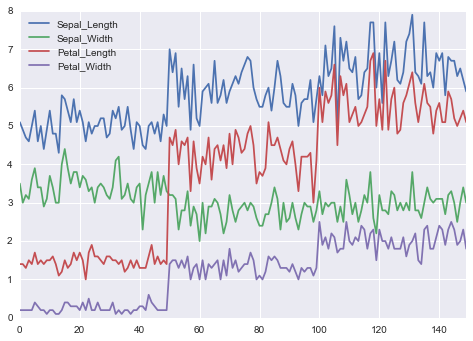

In [12]:
# apply the `plot()` method to a data frame

df.plot();

This plots all of the variables against the index as a simple line graph, with the legend providing the name of the variables. This may or may not be what you ultimately intend to do since this type of graph is suggesting a relationship between the samples that may or may really be there. However, it is really easy to obtain and sets the stage for some more interesting graphs.

For instance, if we use the `plot()` method in the pandas library, we can very rapidly switch between types of plots by switching the `kind` of plot being produced.

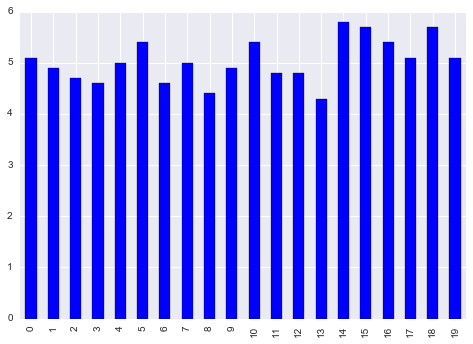

In [13]:
df.Sepal_Length[:20].plot(kind='bar')

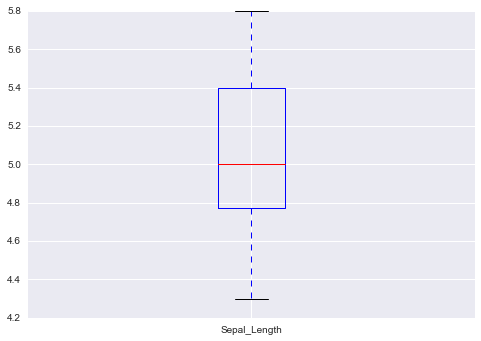

In [14]:
df.Sepal_Length[:20].plot(kind='box')

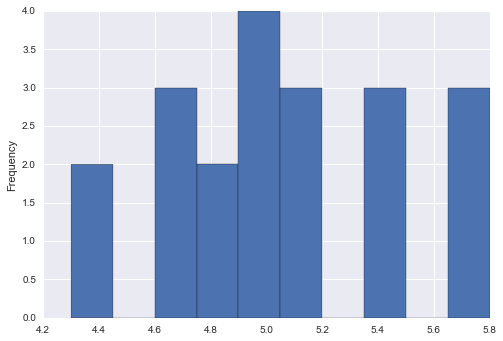

In [15]:
df.Sepal_Length[:20].plot(kind='hist')

**An Aside: Creating Useful Plots**

Throughout most of this notebook, we'll tend to use functions that are quite similar to the `plot()` method we just saw. Again, the main beauty of these methods is that they are simple. The down side, however, is that they don't offer much control.

An alternative approach to plotting uses the subplots() method to create a figure and a set of axes which can be manipulated directly. This is purely a matter of opinion, but variations on this theme seem to offer the easiest and most complete mechanism for controlling the appearance of the plot. Some of the options you can control are illustrated below.

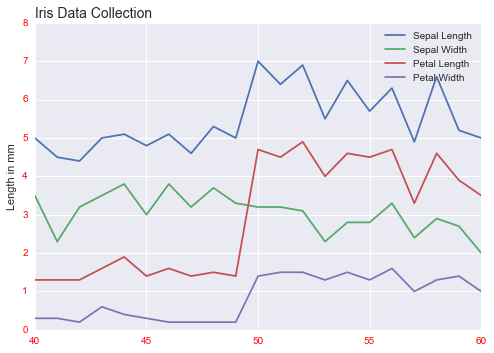

In [16]:
fig, ax = plt.subplots()

df.plot(ax=ax)

# set the title, change the fontsizeof the title and locate in the upper left corner
ax.set_title('Iris Data Collection', fontsize=14, loc='left')

# set the label on the y axis
ax.set_ylabel('Length in mm')

# more descriptive variable names
ax.legend(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

# shrink x axis limits
ax.set_xlim(40,60)

# change tick labels to red
ax.tick_params(labelcolor='red')

**Another Aside: Setting the Style**

In [17]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

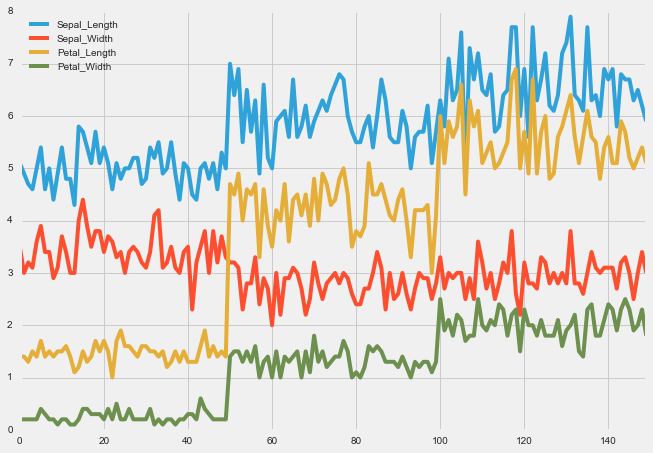

In [18]:
with plt.style.context(('fivethirtyeight')):
    df.plot(figsize=(10,7));

In [19]:
# Now that we know how to do it, let's use a style that's a bit prettier than the default for the rest of the notebook
mpl.style.use('fivethirtyeight')

**Plotting a Single Line**

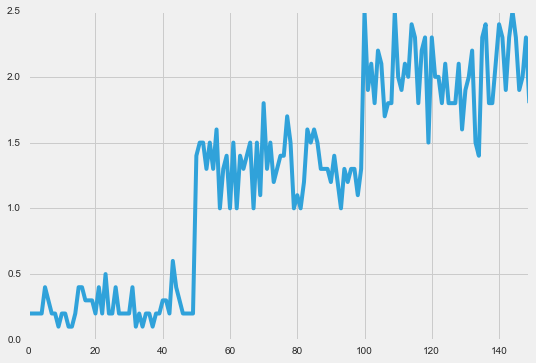

In [20]:
# Remember that we can create a new dataframe by extracting out the variables we're interested in
# Here we use that approach to choose the Petal_Width variable and then plot it.

df['Petal_Width'].plot();

**Plotting Multiple Lines**

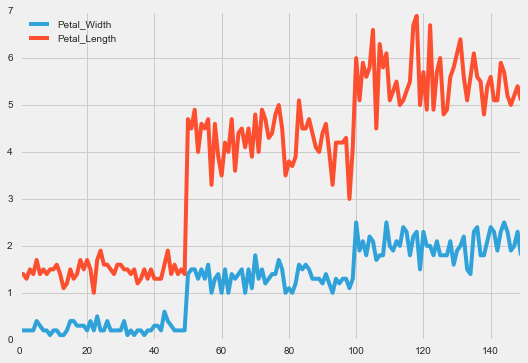

In [21]:
# Choose the variables you wish to plot using a list of variable names, and
# then just perform the normal `plot()`
df[['Petal_Width', 'Petal_Length']].plot();

**Bar Plots**

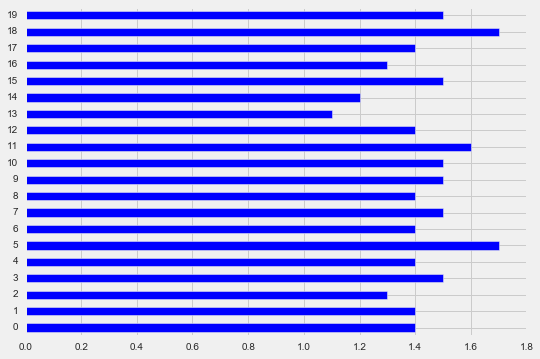

In [22]:
# Choose the first 20 samples of Petal_Length and then plot a bar plot
df['Petal_Length'].head(20).plot.barh()

# As an aside, here's an alternative approach to achieve the same objective
# df['Petal_Length'].head(20).plot(kind='bar');

**Histograms**

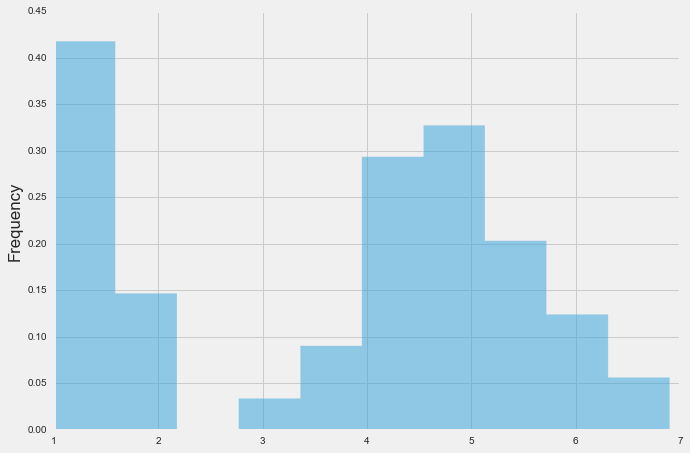

In [23]:
df['Petal_Length'].plot.hist(bins=10, alpha=0.5, figsize=(10,7), histtype='stepfilled', normed=True);

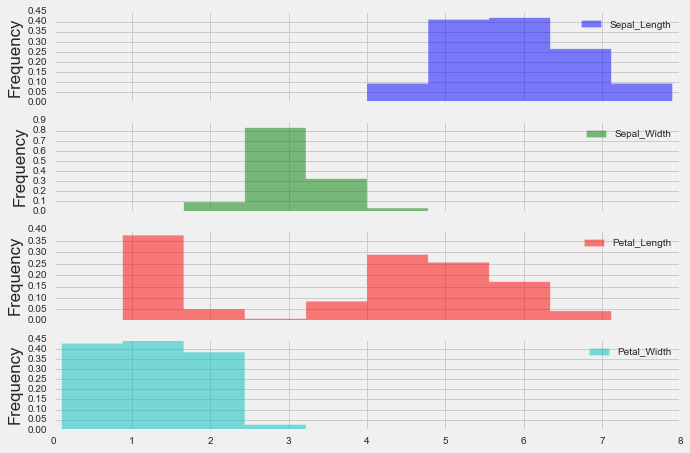

In [24]:
df.plot.hist(bins=10,figsize=(10,7), histtype='stepfilled', normed=True, alpha=0.5, subplots=True);

**Plotting Convenience Using Seaborn**

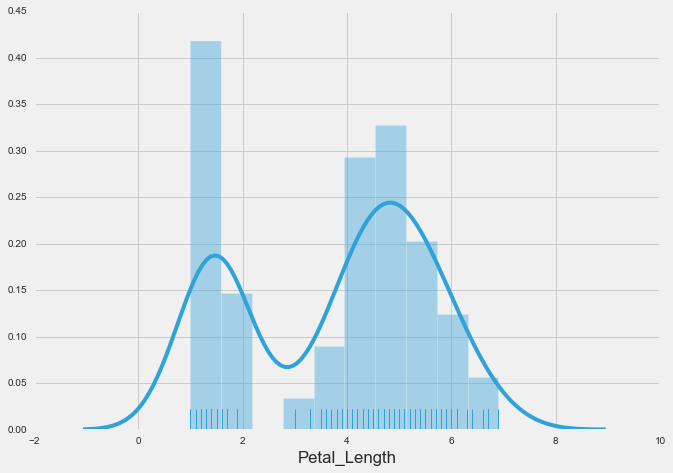

In [25]:
import seaborn as sns

g = sns.distplot(df.Petal_Length,rug=True, bins=10);
g.figure.set_size_inches(10,7)

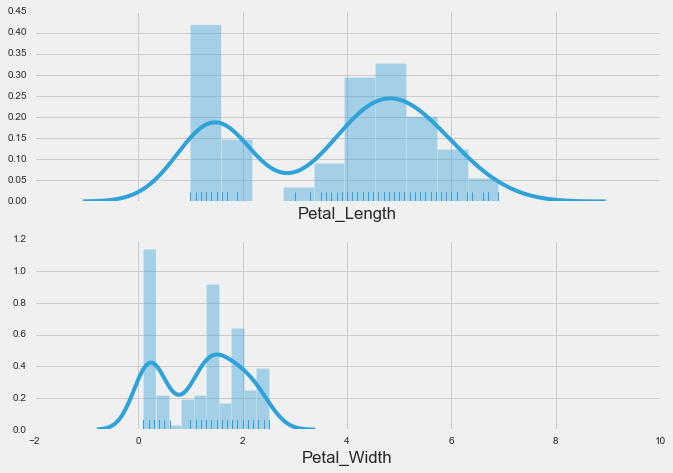

In [26]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,7))
sns.distplot(df.Petal_Length, rug=True, bins=10, ax=axes[0]);
sns.distplot(df.Petal_Width, rug=True, bins=10, ax=axes[1]);

**Boxplots**

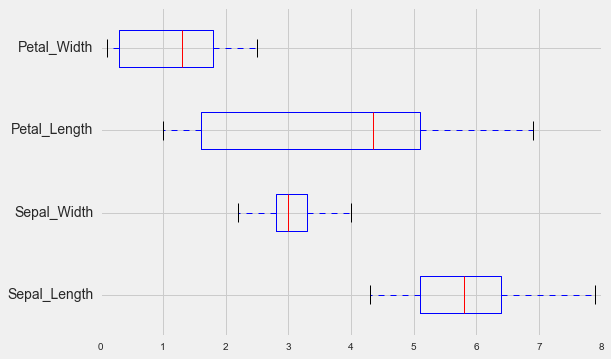

In [27]:
df.boxplot(return_type='axes', vert =False, figsize=(10,10))

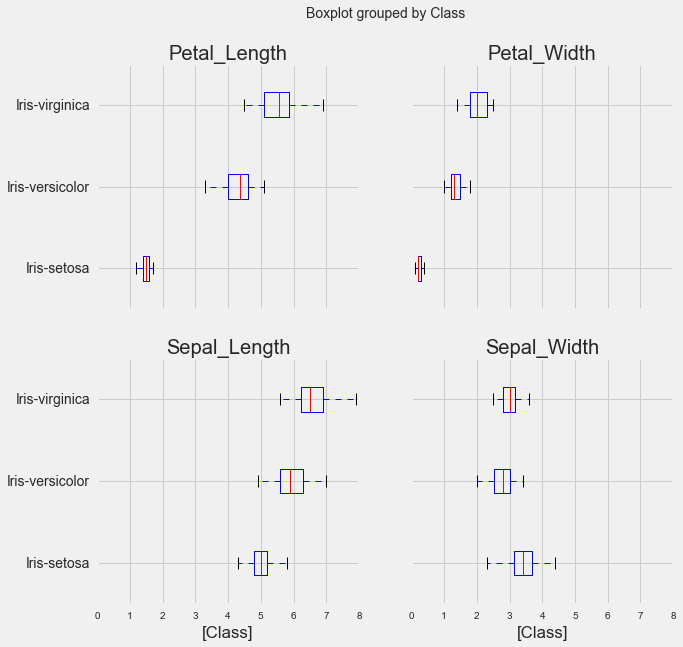

In [28]:
df.boxplot(return_type='axes', vert =False, figsize=(10,10), by='Class');

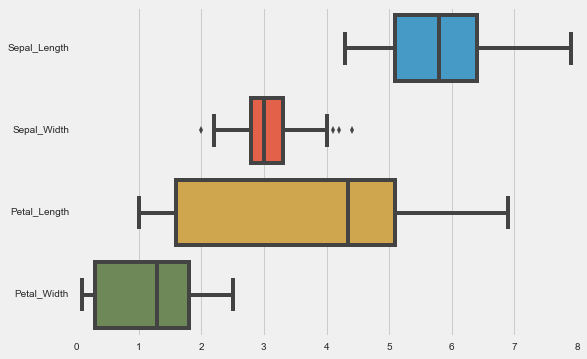

In [29]:
sns.boxplot(data=df, orient='h')

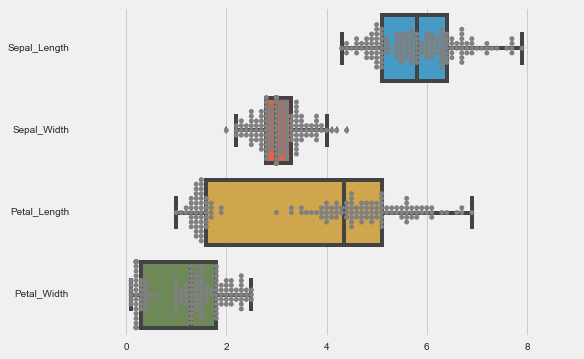

In [30]:
sns.boxplot(data=df, orient='h')
sns.swarmplot(data=df, orient='h', color='grey')

         Class   measurement  value
0  Iris-setosa  Sepal_Length    5.1
1  Iris-setosa  Sepal_Length    4.9
2  Iris-setosa  Sepal_Length    4.7
3  Iris-setosa  Sepal_Length    4.6
4  Iris-setosa  Sepal_Length    5.0


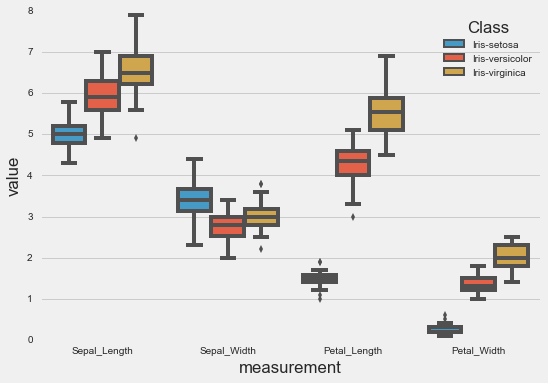

In [31]:
df_melt = pd.melt(df,'Class', var_name='measurement')
print df_melt.head()

sns.boxplot(data=df_melt, x='measurement', y='value', hue='Class')

### The Relationships Between Variables

In [32]:
# the pairwise correlation of each variable in the table
df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


**Scatter Plots**

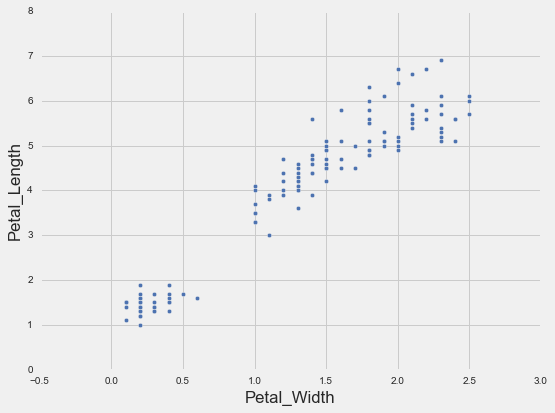

In [33]:
df.plot.scatter('Petal_Width', 'Petal_Length', figsize=(8,6));

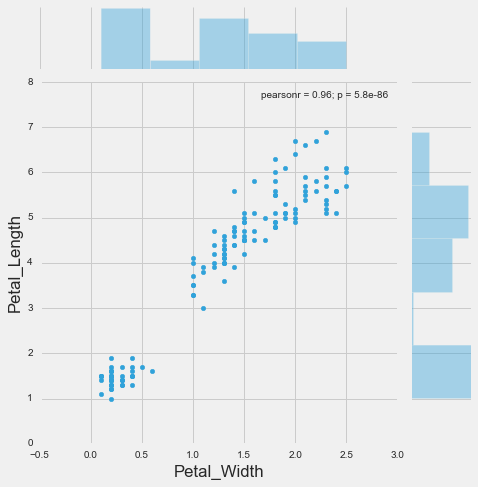

In [34]:
sns.jointplot(data=df, x='Petal_Width', y='Petal_Length', size=7)

**Scatter Matrix Plot**

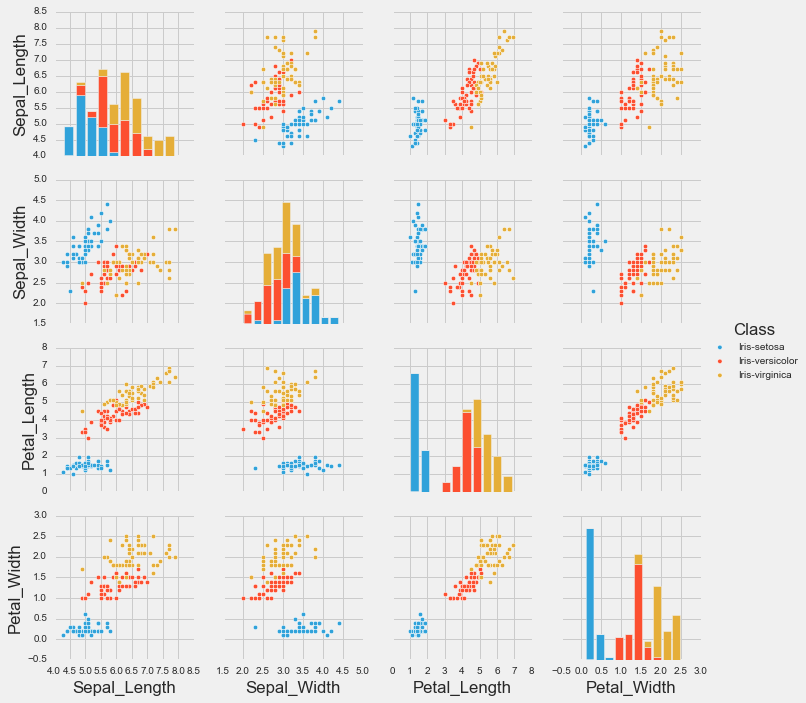

In [35]:
sns.pairplot(df, hue='Class')

### Comparing Multivariate Data

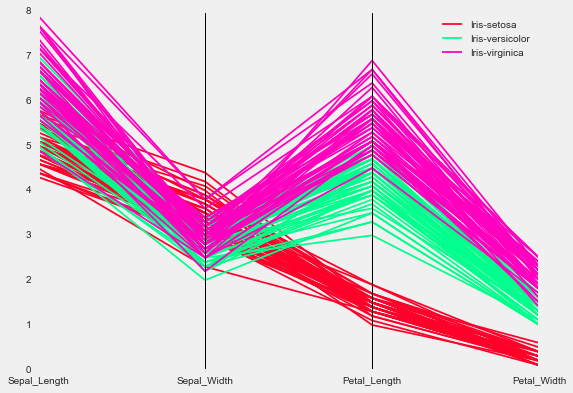

In [36]:
from pandas.tools.plotting import parallel_coordinates

with plt.style.context(('seaborn-notebook')):
    plt.figure(figsize=(8,6))
    parallel_coordinates(df, 'Class', colormap='gist_rainbow');

### Plotting Categorical Data

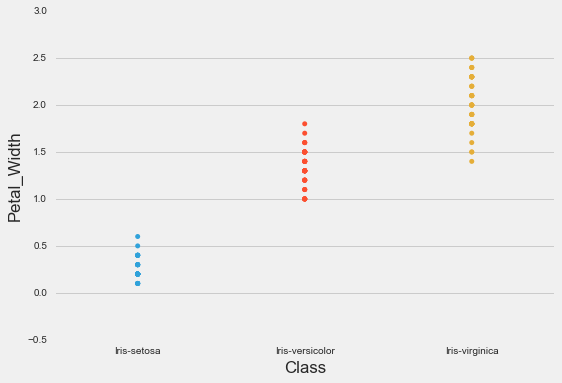

In [37]:
sns.stripplot(x="Class", y="Petal_Width", data=df);

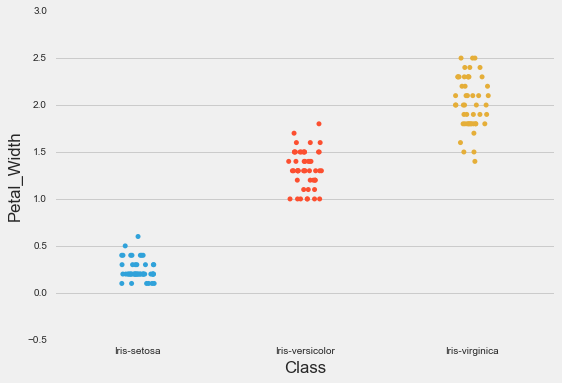

In [38]:
sns.stripplot(x="Class", y="Petal_Width", data=df, jitter= True);

In [39]:
df_melt = pd.melt(df,'Class', var_name='measurement')
print df_melt.head(5)

         Class   measurement  value
0  Iris-setosa  Sepal_Length    5.1
1  Iris-setosa  Sepal_Length    4.9
2  Iris-setosa  Sepal_Length    4.7
3  Iris-setosa  Sepal_Length    4.6
4  Iris-setosa  Sepal_Length    5.0


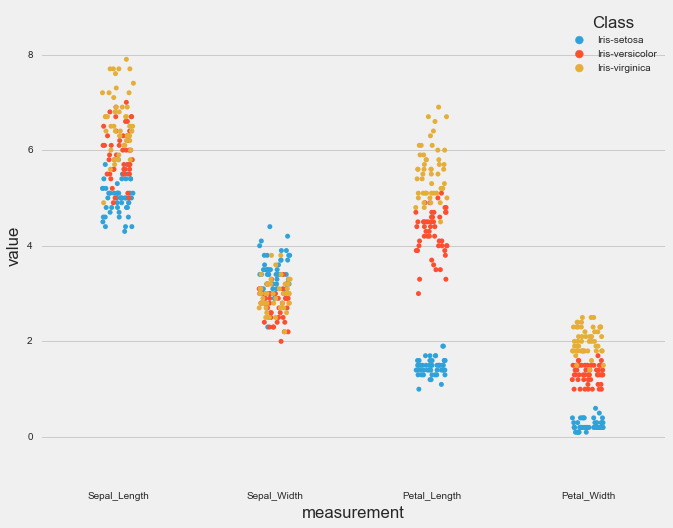

In [40]:
plt.figure(figsize=(10,8))
sns.stripplot(x='measurement', y='value', hue='Class', data=df_melt, jitter= True);

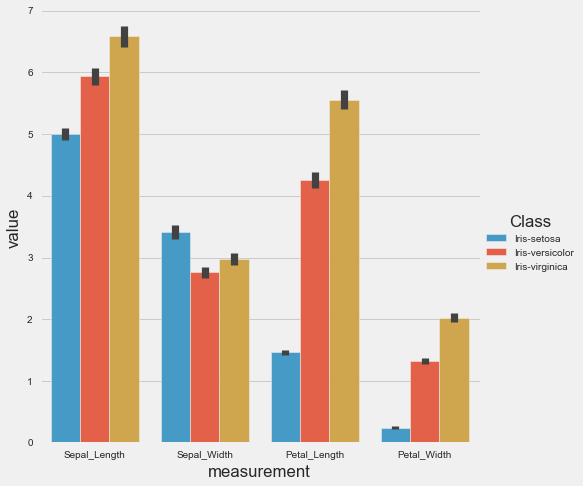

In [41]:
plt.figure(figsize=(10,10))
sns.factorplot(x='measurement', y='value', hue="Class", data=df_melt, kind="bar", size=7)

### References

* [Pandas Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [Seaborn Visualization](https://stanford.edu/~mwaskom/software/seaborn/api.html)